In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [39]:
#TRATANDO OS DADOS

In [40]:
df = pd.read_excel('populacao_ibge_2025.xlsx', sheet_name=None, header=None)

In [41]:
df = pd.concat(df.values(), ignore_index=True)

In [42]:
df = df.dropna()

In [43]:
df = df.reset_index()

In [44]:
df = df.drop('index', axis=1)

In [45]:
df = df.drop(0)

In [46]:
df.columns = ['UF', 'cod_UF', 'cod_mun', 'municipio', 'habitantes']

In [47]:
df['UF'] = df['UF'].astype('string')
df['municipio'] = df['municipio'].astype('string')
df['cod_UF'] = pd.to_numeric(df['cod_UF'], errors='coerce')
df['habitantes'] = ( df['habitantes'] .str.replace('.', '', regex=False).str.replace(',', '', regex=False))
df['habitantes'] = pd.to_numeric(df['habitantes'], errors='coerce')

In [48]:
condicoes = [
    (df['cod_UF'] >= 11) & (df['cod_UF'] < 18),
    (df['cod_UF'] >= 21) & (df['cod_UF'] < 30),
    (df['cod_UF'] >= 31) & (df['cod_UF'] < 36),
    (df['cod_UF'] >= 41) & (df['cod_UF'] < 44),
    (df['cod_UF'] >= 50) & (df['cod_UF'] < 54)
]

In [49]:
regioes = ['norte', 'nordeste', 'sudeste', 'sul', 'centro-oeste']
df['região'] = np.select(condicoes, regioes, default = 'nada')

In [50]:
df = df[df['UF'] != 'UF']
df.reset_index()

,index,UF,cod_UF,cod_mun,municipio,habitantes,região
0,1,RO,11.0,00015,Alta Floresta D'Oeste,22787.0,norte
1,2,RO,11.0,00023,Ariquemes,109170.0,norte
2,3,RO,11.0,00031,Cabixi,5664.0,norte
3,4,RO,11.0,00049,Cacoal,98280.0,norte
4,5,RO,11.0,00056,Cerejeiras,16966.0,norte
...,...,...,...,...,...,...,...
5566,5685,GO,52.0,22005,Vianópolis,15644.0,centro-oeste
5567,5686,GO,52.0,22054,Vicentinópolis,9175.0,centro-oeste
5568,5687,GO,52.0,22203,Vila Boa,4145.0,centro-oeste
5569,5688,GO,52.0,22302,Vila Propício,6028.0,centro-oeste


In [51]:
#VISUALIZAÇÃO BÁSICA

df.head()

,UF,cod_UF,cod_mun,municipio,habitantes,região
1,RO,11.0,00015,Alta Floresta D'Oeste,22787.0,norte
2,RO,11.0,00023,Ariquemes,109170.0,norte
3,RO,11.0,00031,Cabixi,5664.0,norte
4,RO,11.0,00049,Cacoal,98280.0,norte
5,RO,11.0,00056,Cerejeiras,16966.0,norte


In [52]:
#POPULAÇÃO TOTAL
df['habitantes'].sum()


np.float64(213417339.0)

In [53]:
#ESTADOS ÚNICOS

df['UF'].unique()

<StringArray>
['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE',
 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO',
 'DF']
Length: 27, dtype: string

In [54]:
#FILTRO MAIORES DE 500.000 HABITANTES

df_cidadesGrandes = df[df['habitantes'] > 500_000]

In [55]:
df_cidadesGrandes.head()

,UF,cod_UF,cod_mun,municipio,habitantes,região
17,RO,11.0,00205,Porto Velho,517709.0,norte
114,AM,13.0,02603,Manaus,2303732.0,norte
164,PA,15.0,00800,Ananindeua,509227.0,norte
173,PA,15.0,01402,Belém,1397315.0,norte
649,MA,21.0,11300,São Luís,1089215.0,nordeste


In [56]:
#ORDENAÇÃO DE 10 CIDADES MAIS POPULOSAS

df.sort_values(by= 'habitantes', ascending= False).head(10)

,UF,cod_UF,cod_mun,municipio,habitantes,região
3911,SP,35.0,50308,São Paulo,11904961.0,sudeste
3312,RJ,33.0,04557,Rio de Janeiro,6730729.0,sudeste
5689,DF,53.0,00108,Brasília,2996899.0,centro-oeste
970,CE,23.0,04400,Fortaleza,2578483.0,nordeste
2209,BA,29.0,27408,Salvador,2564204.0,nordeste
2359,MG,31.0,06200,Belo Horizonte,2415872.0,sudeste
114,AM,13.0,02603,Manaus,2303732.0,norte
4091,PR,41.0,06902,Curitiba,1830795.0,sul
1631,PE,26.0,11606,Recife,1588376.0,nordeste
5534,GO,52.0,08707,Goiânia,1503256.0,centro-oeste


In [57]:
#ORDENAÇÃO DE ESTADOS MAIS POPULOSOS

df.groupby('UF')['habitantes'].sum().sort_values(ascending = False)

UF
SP    46080869.0
MG    21392585.0
RJ    17223547.0
BA    14870907.0
PR    11890517.0
RS    11233263.0
PE     9562007.0
CE     9268836.0
PA     8711196.0
SC     8187029.0
GO     7422716.0
MA     7018211.0
AM     4321616.0
PB     4164468.0
ES     4126854.0
MT     3892662.0
RN     3455236.0
PI     3384547.0
AL     3220848.0
DF     2996899.0
MS     2924631.0
SE     2299425.0
RO     1751950.0
TO     1586859.0
AC      884372.0
AP      806517.0
RR      738772.0
Name: habitantes, dtype: float64

In [58]:
#PARTICIPAÇÃO PERCENTUAL DE CADA CIDADE EM RELAÇÃO AO BRASIL
pop_total = df['habitantes'].sum()
df['porcentagem_br'] = (df['habitantes'] / pop_total ) * 100
df.head()

,UF,cod_UF,cod_mun,municipio,habitantes,região,porcentagem_br
1,RO,11.0,00015,Alta Floresta D'Oeste,22787.0,norte,0.010677
2,RO,11.0,00023,Ariquemes,109170.0,norte,0.051153
3,RO,11.0,00031,Cabixi,5664.0,norte,0.002654
4,RO,11.0,00049,Cacoal,98280.0,norte,0.046051
5,RO,11.0,00056,Cerejeiras,16966.0,norte,0.007950


In [59]:
#ESTATÍSTICAS DE CADA REGIÃO BRASILEIRA

df.groupby('região').agg( pop_media_mun = ('habitantes', 'mean'),
                          pop_max_mun = ('habitantes', 'max'),
                          pop_min_mun = ('habitantes' , 'min')
)

,pop_media_mun,pop_max_mun,pop_min_mun
região,,,
centro-oeste,36989.072961,2996899.0,1417.0
nordeste,31908.854515,2578483.0,1355.0
norte,41780.626667,2303732.0,1220.0
sudeste,53315.639256,11904961.0,1072.0
sul,26289.512175,1830795.0,1156.0


In [60]:
#MUNICÍPIO MAIS POPULOSO POR ESTADO

pop_estado = df.groupby('UF')['habitantes'].transform('sum')
df['porcentagem_estadual'] = (df['habitantes'] / pop_estado ) * 100
idx = df.groupby('região')['habitantes'].idxmax()

df.loc[idx, ['região','UF', 'municipio', 'porcentagem_estadual']]

,região,UF,municipio,porcentagem_estadual
5689,centro-oeste,DF,Brasília,100.000000
970,nordeste,CE,Fortaleza,27.818844
114,norte,AM,Manaus,53.307189
3911,sudeste,SP,São Paulo,25.834932
4091,sul,PR,Curitiba,15.397102


In [61]:
#CONCENTRAÇÃO POPULACIONAL

condicoes2 = [
    (df['habitantes'] <= 50_000),
    ((df['habitantes'] >= 50_000) & (df['habitantes'] < 100_000)),
    ((df['habitantes'] >= 100_000) & (df['habitantes'] < 500_000)),
    ((df['habitantes'] >= 500_000) & (df['habitantes'] < 1_000_000)),
    (df['habitantes'] > 1_000_000)
]

faixa_pop = ['tamanho municipal', 'tamanho regional', 'tamanho metropolitano', 'tamanho estadual', 'tamanho federal']
df['faixa_populacional'] = np.select(condicoes2, faixa_pop, default = 'none')
df = df[df['faixa_populacional'] != 'none' ]

In [62]:
pop_faixa = df.groupby('faixa_populacional')['habitantes'].transform('sum')
df.loc[:, 'porcentagem_faixa'] = (df['habitantes'] / pop_faixa) * 100
df[df['faixa_populacional'] == 'tamanho federal'].sort_values(by= 'porcentagem_faixa', ascending= False).head(20)

,UF,cod_UF,cod_mun,municipio,habitantes,região,porcentagem_br,porcentagem_estadual,faixa_populacional,porcentagem_faixa
3911,SP,35.0,50308,São Paulo,11904961.0,sudeste,5.578254,25.834932,tamanho federal,27.796038
3312,RJ,33.0,04557,Rio de Janeiro,6730729.0,sudeste,3.153787,39.078646,tamanho federal,15.715095
5689,DF,53.0,00108,Brasília,2996899.0,centro-oeste,1.404243,100.000000,tamanho federal,6.997244
970,CE,23.0,04400,Fortaleza,2578483.0,nordeste,1.208188,27.818844,tamanho federal,6.020315
2209,BA,29.0,27408,Salvador,2564204.0,nordeste,1.201498,17.243091,tamanho federal,5.986976
2359,MG,31.0,06200,Belo Horizonte,2415872.0,sudeste,1.131994,11.293034,tamanho federal,5.640646
114,AM,13.0,02603,Manaus,2303732.0,norte,1.079449,53.307189,tamanho federal,5.378818
4091,PR,41.0,06902,Curitiba,1830795.0,sul,0.857847,15.397102,tamanho federal,4.274592
1631,PE,26.0,11606,Recife,1588376.0,nordeste,0.744258,16.611324,tamanho federal,3.708585
5534,GO,52.0,08707,Goiânia,1503256.0,centro-oeste,0.704374,20.252102,tamanho federal,3.509844


In [63]:
df.groupby('faixa_populacional').agg(municipios_por_faixa = ('municipio' , 'count')).sort_values(by= 'municipios_por_faixa', ascending= False)

,municipios_por_faixa
faixa_populacional,
tamanho municipal,4885
tamanho regional,344
tamanho metropolitano,290
tamanho estadual,33
tamanho federal,15


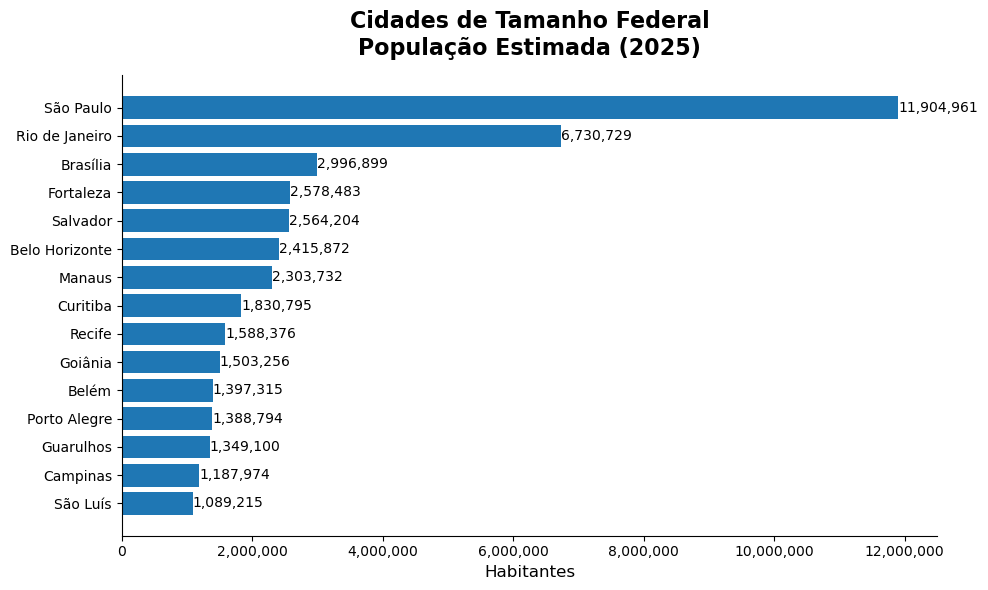

In [81]:
#VISUALIZAÇÃO DE DADOS

#GRÁFICO DE BARRAS - CIDADES DE TAMANHO FEDERAL

plt.figure(figsize=(10,6))

bars = plt.barh(df_federal["municipio"],df_federal["habitantes"])

plt.gca().invert_yaxis()
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Título e rótulos
plt.title("Cidades de Tamanho Federal\nPopulação Estimada (2025)", 
          fontsize=16, weight="bold", pad=15)

plt.xlabel("Habitantes", fontsize=12)
plt.ylabel("")

# Formatar eixo X com separador de milhar
plt.gca().xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, p: format(int(x), ","))
)

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height()/2,
        f'{int(width):,}',
        va='center',
        ha='left',
        fontsize=10)

plt.tight_layout()
plt.show()

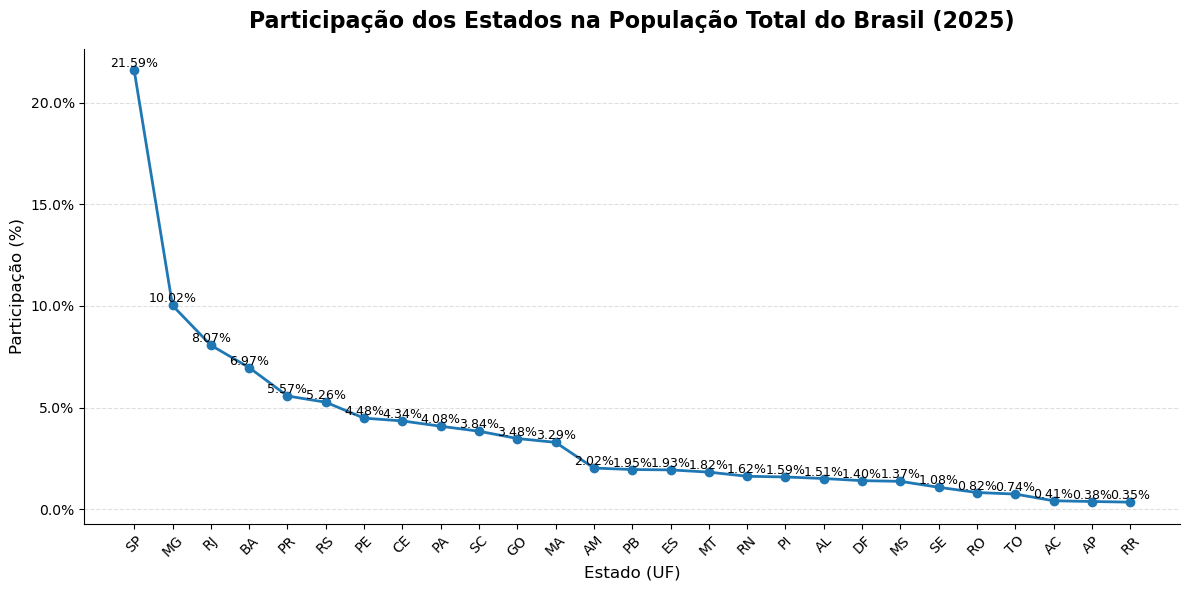

In [84]:
# GRÁFICO DE LINHA - PARTICIPAÇÃO DE ESTADOS NA POPULAÇÃO TOTAL

# Agrupar por UF (caso existam várias cidades por estado)
participacao = df.groupby("UF")["porcentagem_br"].sum()

participacao = participacao.sort_values(ascending=False)

plt.figure(figsize=(12,6))

plt.plot(
    participacao.index,
    participacao.values,
    marker="o",
    linewidth=2)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.title(
    "Participação dos Estados na População Total do Brasil (2025)",
    fontsize=16,
    weight="bold",
    pad=15)

plt.xlabel("Estado (UF)", fontsize=12)
plt.ylabel("Participação (%)", fontsize=12)


plt.gca().yaxis.set_major_formatter(
    mtick.PercentFormatter(xmax=100))

plt.xticks(rotation=45)

for i, v in enumerate(participacao.values):
    plt.text(i,v,
        f"{v:.2f}%",
        ha="center",
        va="bottom",
        fontsize=9)

plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

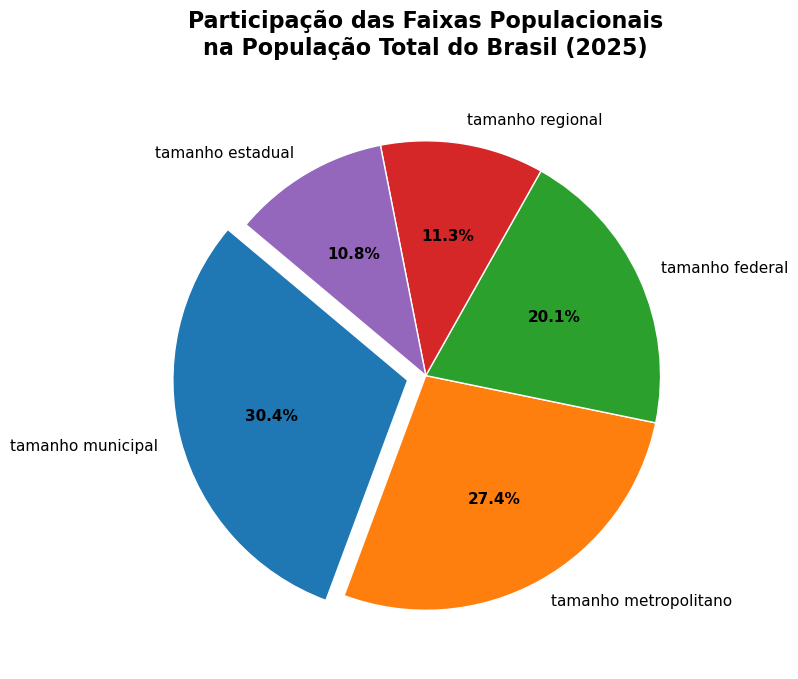

In [85]:
#GRÁFICO DE PIZZA - PARTICIPAÇÃO DE CADA FAIXA POPULACIONAL NA POPULAÇÃO TOTAL

faixa_pop = df.groupby("faixa_populacional")["habitantes"].sum()

faixa_pop = faixa_pop.sort_values(ascending=False)

total = faixa_pop.sum()
percentuais = (faixa_pop / total) * 100

plt.figure(figsize=(8,8))

explode = [0.08 if i == 0 else 0 for i in range(len(faixa_pop))]

wedges, texts, autotexts = plt.pie(
    faixa_pop,
    labels=faixa_pop.index,
    autopct="%1.1f%%",
    startangle=140,
    explode=explode,
    wedgeprops={"edgecolor": "white"},
    textprops={"fontsize": 11})

plt.title(
    "Participação das Faixas Populacionais\nna População Total do Brasil (2025)",
    fontsize=16,
    weight="bold",
    pad=20)

for autotext in autotexts:
    autotext.set_weight("bold")

plt.tight_layout()
plt.show()